In [ ]:
pip install pandas

1. Dataset Selection and Justification
Chosen Dataset:
📊 Heart Disease UCI Dataset
(Source: Kaggle - Heart Disease UCI)

Why it fits:

✅ 14 attributes (age, sex, chest pain type, cholesterol, etc.)

✅ 303 records

✅ Focused on healthcare, a practical and high-impact domain

✅ Balanced in terms of classification target (presence or absence of heart disease)

✅ Requires real-world preprocessing (missing values, encoding, scaling)



2. Load Dataset & Inspect Structure


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('heart.csv')

# Preview dataset
print(df.head())

# Dataset structure
print(df.info())
print(df.describe())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       29


📌 3. Data Cleaning
🔹 a. Handle Missing Values



In [7]:
# Check for missing values
print(df.isnull().sum())

# Option 1: Impute missing numeric values with median
df['chol'] = df['chol'].fillna(df['chol'].median())

# Option 2: Drop rows with missing values
df.dropna(inplace=True)


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


b. Remove Duplicates

In [8]:
df.drop_duplicates(inplace=True)


 c. Fix Inconsistent or Noisy Data

In [10]:
# Example: Cap extreme values or remove obvious noise
import numpy as np

# Replace zero values in cholesterol where physiologically impossible
df = df[df['chol'] > 0]

# Normalize or standardize if needed in next phase


📌 4. Exploratory Data Analysis (EDA)


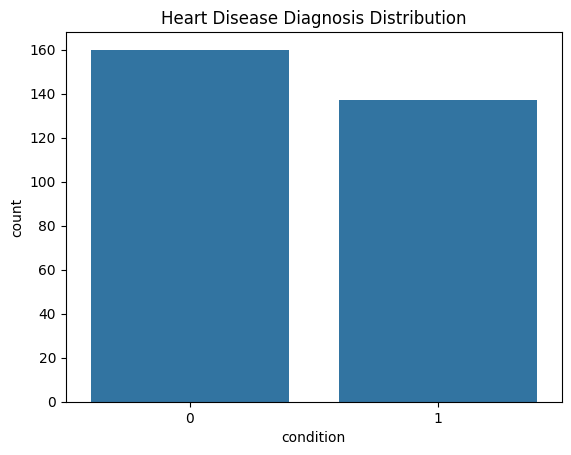

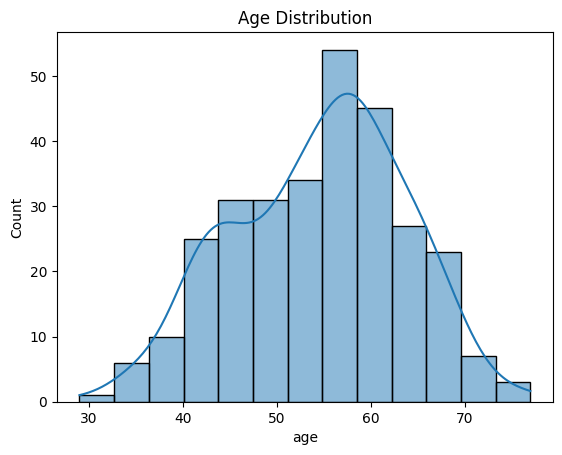

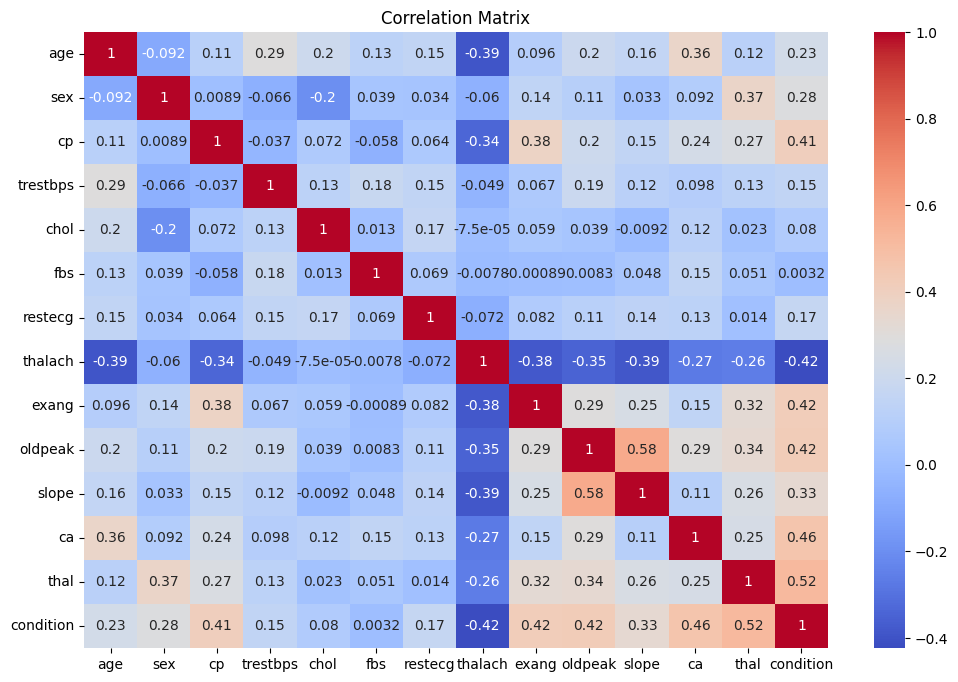

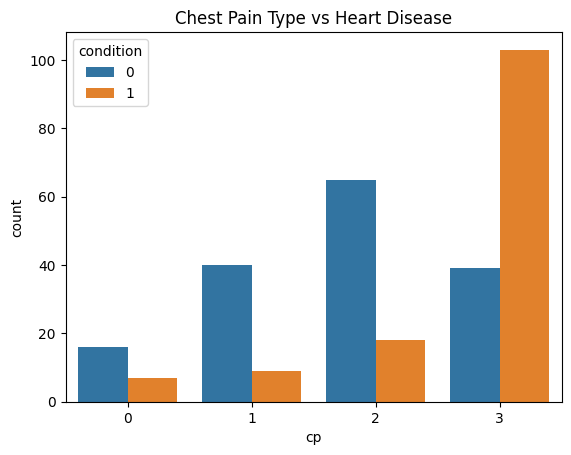

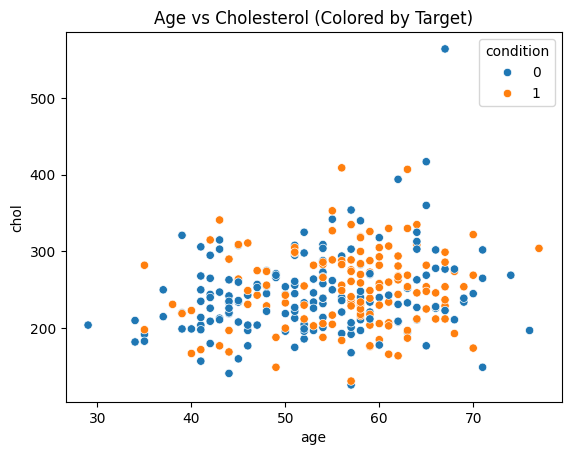

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# condition variable distribution
sns.countplot(x='condition', data=df)
plt.title("Heart Disease Diagnosis Distribution")
plt.show()

# Age distribution
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Chest pain type vs condition
sns.countplot(x='cp', hue='condition', data=df)
plt.title("Chest Pain Type vs Heart Disease")
plt.show()

# Scatter: age vs cholesterol
sns.scatterplot(x='age', y='chol', hue='condition', data=df)
plt.title("Age vs Cholesterol (Colored by Target)")
plt.show()
